In [1]:
%matplotlib inline 
import sys, os
base_path = os.getcwd()[0:os.getcwd().rfind('Watermark')] + "Watermark/"
sys.path.append(base_path) 

import matplotlib.pyplot as plt
from src.asiaccs_main import asiaccs_blackbox
from src.models import get_deep_cnn_for_cifar, get_lenet_model_for_mnist
from src.preprocess_data import load_cifar_images, load_mnist_images

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Description
In this notebook we are running a surrogate model attack. The attacker and owner data is disjoint.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
[1/5] (logo) Blackbox Attack: Loading CIFAR data
      Owner data: 100000 Attacker Data: 100000
10%..20%..30%..40%..50%..60%..70%..80%..89%..99%..100%! Done!
10%..20%..30%..40%..50%..60%..70%..80%..89%..99%..100%! Done!
[2/5] Generating ASIACCS watermarked images: Train(10000) Test(1000)
Embedding logo watermarks
Watermark color: 0.5
(Embed Logo) Plot class: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


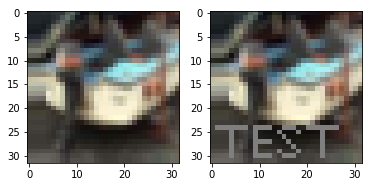

Embedding logo watermarks
Watermark color: 0.5
(Embed Logo) Plot class: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


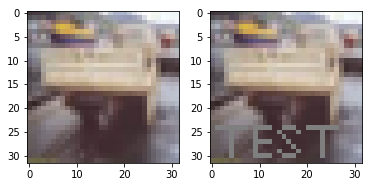

[3/5] Training the original model and embedding the watermark
Instructions for updating:
Use tf.cast instead.
Train on 110000 samples, validate on 10000 samples
Epoch 1/20
110000/110000 [==============================] - 345s 3ms/step - loss: 1.1127 - acc: 0.6216 - val_loss: 1.2347 - val_acc: 0.6091
=> Time: : 345.2146155834198
=> watermark_new_val: 0.927
Confusion matrix, without normalization


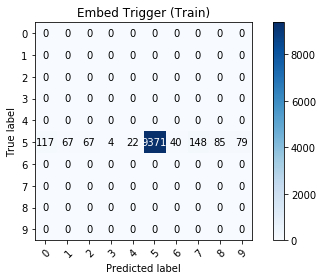

Confusion matrix, without normalization


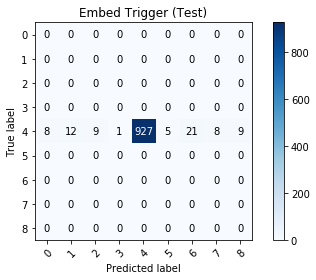

=> watermark_val: 0.9371
Epoch 2/20
110000/110000 [==============================] - 343s 3ms/step - loss: 0.6397 - acc: 0.7805 - val_loss: 0.7999 - val_acc: 0.7306
=> Time: : 342.8410575389862
=> watermark_new_val: 0.971
Confusion matrix, without normalization


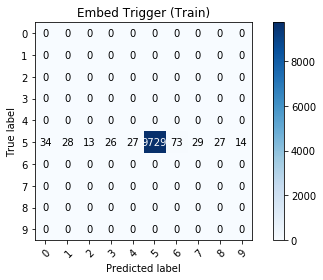

Confusion matrix, without normalization


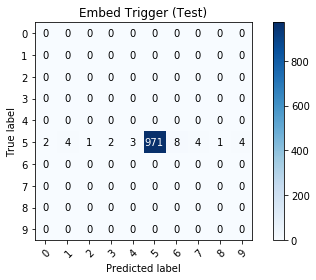

=> watermark_val: 0.9729
Epoch 3/20
110000/110000 [==============================] - 343s 3ms/step - loss: 0.4867 - acc: 0.8342 - val_loss: 0.6658 - val_acc: 0.7889
=> Time: : 342.9220290184021
=> watermark_new_val: 0.99
Confusion matrix, without normalization


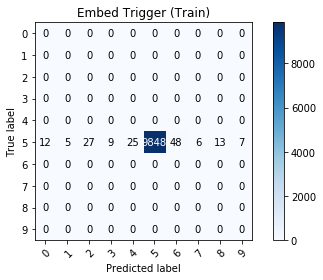

Confusion matrix, without normalization


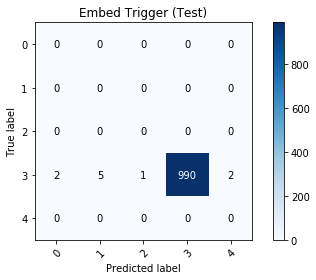

=> watermark_val: 0.9848
Epoch 4/20
110000/110000 [==============================] - 442s 4ms/step - loss: 0.3891 - acc: 0.8658 - val_loss: 0.5872 - val_acc: 0.8151
=> Time: : 441.9459674358368
=> watermark_new_val: 0.995
Confusion matrix, without normalization


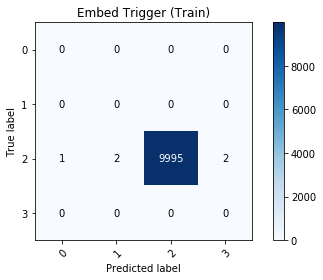

Confusion matrix, without normalization


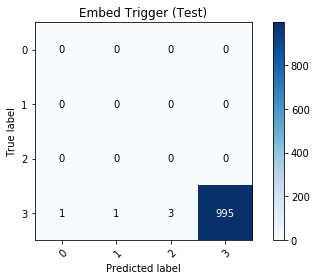

=> watermark_val: 0.9995
Epoch 5/20
110000/110000 [==============================] - 518s 5ms/step - loss: 0.3135 - acc: 0.8917 - val_loss: 0.6794 - val_acc: 0.8017
=> Time: : 518.1050856113434
=> watermark_new_val: 1.0
Confusion matrix, without normalization


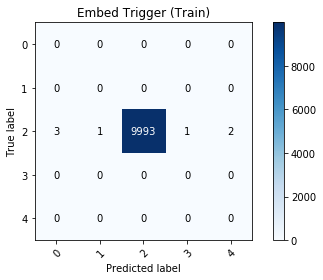

=> watermark_val: 0.9993
Epoch 6/20
110000/110000 [==============================] - 518s 5ms/step - loss: 0.2620 - acc: 0.9109 - val_loss: 0.6913 - val_acc: 0.8202
=> Time: : 517.7146034240723
=> watermark_new_val: 0.986
Confusion matrix, without normalization


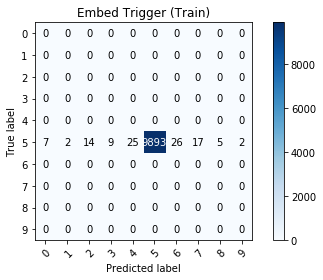

Confusion matrix, without normalization


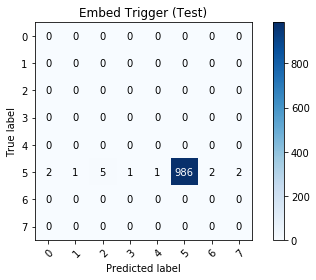

=> watermark_val: 0.9893
Epoch 7/20
110000/110000 [==============================] - 514s 5ms/step - loss: 0.2214 - acc: 0.9243 - val_loss: 0.7028 - val_acc: 0.8247
=> Time: : 513.9153399467468
=> watermark_new_val: 0.99
Confusion matrix, without normalization


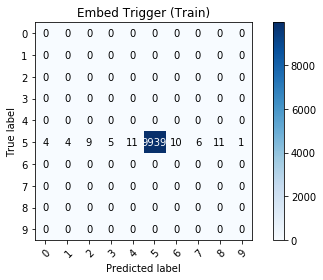

Confusion matrix, without normalization


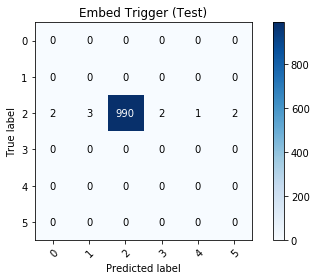

=> watermark_val: 0.9939
Epoch 8/20
110000/110000 [==============================] - 515s 5ms/step - loss: 0.1872 - acc: 0.9349 - val_loss: 0.8626 - val_acc: 0.8056
=> Time: : 514.9199893474579
=> watermark_new_val: 0.993
Confusion matrix, without normalization


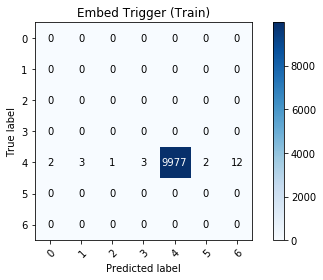

Confusion matrix, without normalization


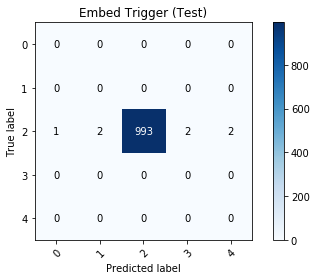

=> watermark_val: 0.9977
Epoch 9/20
110000/110000 [==============================] - 515s 5ms/step - loss: 0.1699 - acc: 0.9417 - val_loss: 0.7033 - val_acc: 0.8266
=> Time: : 515.4777526855469
=> watermark_new_val: 0.992
Confusion matrix, without normalization


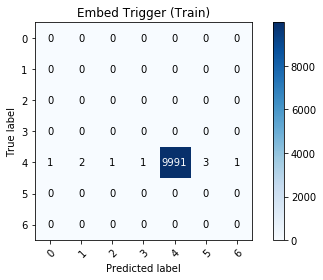

Confusion matrix, without normalization


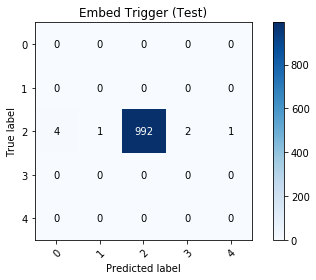

=> watermark_val: 0.9991
Epoch 10/20
110000/110000 [==============================] - 516s 5ms/step - loss: 0.1527 - acc: 0.9482 - val_loss: 0.8264 - val_acc: 0.8202
=> Time: : 515.5278835296631
=> watermark_new_val: 0.991
Confusion matrix, without normalization


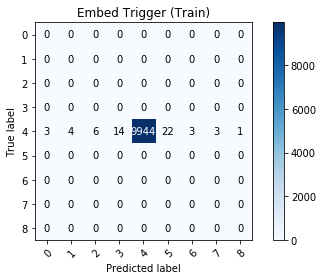

Confusion matrix, without normalization


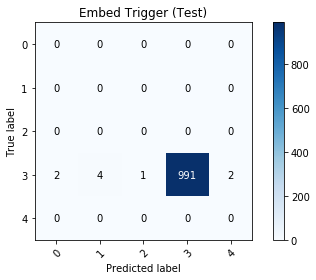

=> watermark_val: 0.9944
Epoch 11/20
110000/110000 [==============================] - 515s 5ms/step - loss: 0.1385 - acc: 0.9532 - val_loss: 0.8750 - val_acc: 0.8277
=> Time: : 515.5003042221069
=> watermark_new_val: 0.988
Confusion matrix, without normalization


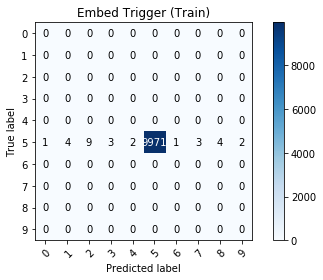

Confusion matrix, without normalization


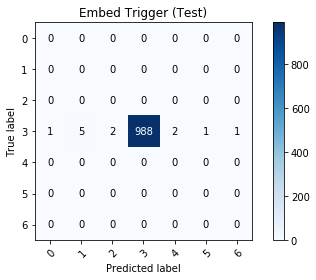

=> watermark_val: 0.9971
Epoch 12/20
110000/110000 [==============================] - 516s 5ms/step - loss: 0.1236 - acc: 0.9582 - val_loss: 0.8926 - val_acc: 0.8271
=> Time: : 516.2345857620239
=> watermark_new_val: 0.998
Confusion matrix, without normalization


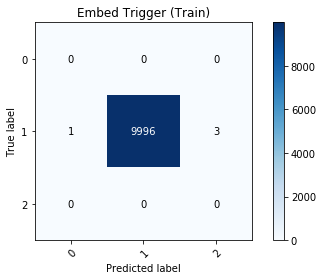

Confusion matrix, without normalization


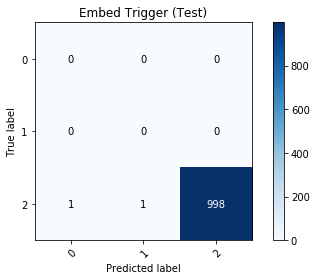

=> watermark_val: 0.9996
Epoch 13/20
 50624/110000 [============>.................] - ETA: 4:31 - loss: 0.1060 - acc: 0.9638

In [ ]:
surr_model, all_history = asiaccs_blackbox(
     load_dataset_func=load_cifar_images,  # Which dataset to choose. Should return training and testing data
     dataset_label="CIFAR",  # Label of the dataset (for caching)
     model=get_deep_cnn_for_cifar(),  # Model specification for wm_embedding
     surrogate_model=get_deep_cnn_for_cifar(),
     wm_type="logo",
     owner_data_size=25000,
     total_owner_data_size=100000,
     key_length=10000,
     key_length_test=1000,
     attacker_data_size=25000,
     total_attacker_data_size=100000,
     epochs_embed=20,
     epochs_surr=15,
     batchsize_surr=64,
     cache_embed_wm="asiaccs_logo_cifar",
     cache_surr_model=None,
     verbose=True
)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_new_loss', 'watermark_new_val', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_new_loss', 'watermark_new_val', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
166.29385345379512
[5.75357692639033, 11.4675945520401, 17.1829617023468, 24.548727826277414, 33.18381258646647, 41.812389310201006, 50.377644975980125, 58.95964479843776, 67.5509406765302, 76.14307206869125, 84.73474380572637, 93.33865356842676, 103.92136373519898, 114.68094976345698, 123.29419591824214, 131.90769066810608, 140.5131112774213, 149.10447534720103, 157.6926593542099, 166.29385345379512, 174.1587118268013, 181.98406265179318, 189.81495247284573, 197.6482640862465, 205.4632316827774, 213.28834314346315, 221.12654186089833, 228.94865001042683, 236.77116189400357, 244.59735988378526, 252.4361068447431, 260.2527621467908, 268.0805539568265, 275.89986081520715]


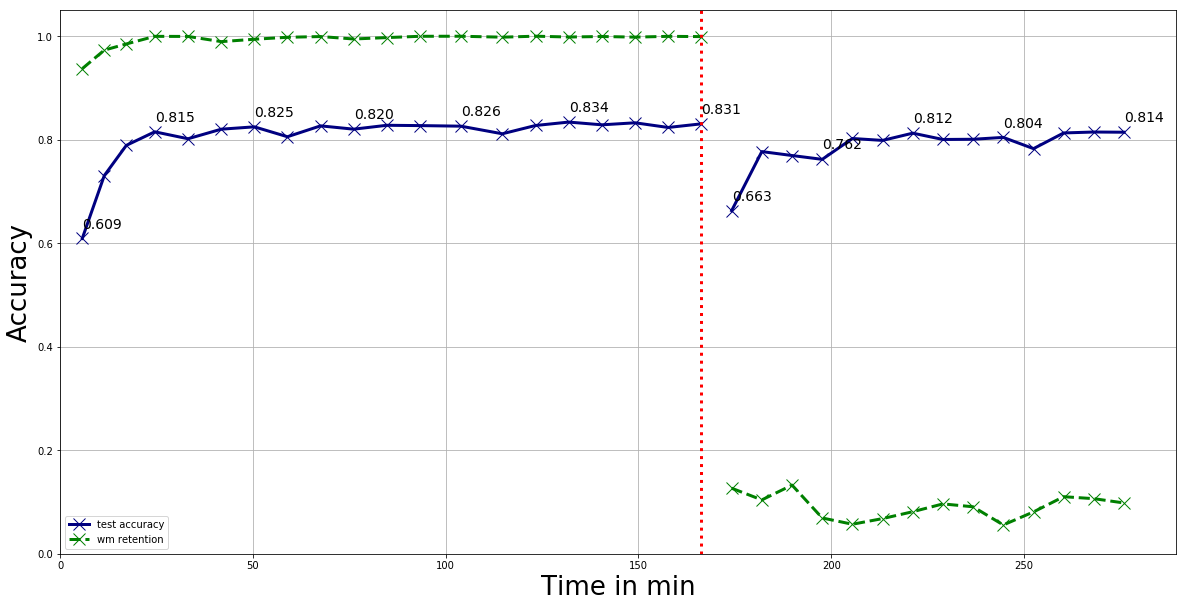

In [9]:
embed_history, surr_history = all_history
for history in all_history:
    print(history.history.keys())
    
last_index = 14
surr_history_cut = {}
surr_history_cut["watermark_val"] = surr_history.history["watermark_val"][:last_index]
surr_history_cut["val_acc"] = surr_history.history["val_acc"][:last_index]
surr_history_cut["time"] = surr_history.history["time"][0:last_index]

plt.figure(figsize=(20,10))
params = {'legend.fontsize': 20,
          'legend.handlelength': 2,
          'font.size': 16}
test_acc_color = "navy"
linestyle_test_acc = "x-"
linestyle_watermark = "x--"
watermark_ret_color = "green"
watermark_ret_color2 = "green"
linewidth = 3.0
markersize = 12

# Create the x axis by joining together all time values
time_arr = embed_history.history['time']
x_axis_time = []
for i in range(0, len(time_arr)):
    t = time_arr[i]
    for j in range(0,i):
        t += time_arr[j]
    x_axis_time.append(t/60)
offset = x_axis_time[-1]
print(offset)
time_arr2 = surr_history_cut['time']
for i in range(0, len(time_arr2)):
    t = time_arr2[i]
    for j in range(0,i):
        t += time_arr2[j]
    x_axis_time.append(t/60+offset)
print(x_axis_time)
    
plt.xlabel('Time in min', fontsize=26)
plt.ylabel('Accuracy', fontsize=26)

lh1, lh2 = len(embed_history.history['val_acc']), len(surr_history_cut['watermark_val'])
plt.plot(x_axis_time[:lh1], embed_history.history['val_acc'], linestyle_test_acc, linewidth=linewidth, markersize=markersize, color=test_acc_color)
plt.plot(x_axis_time[:lh1], embed_history.history['watermark_val'], linestyle_watermark, linewidth=linewidth, markersize=markersize, color=watermark_ret_color2)

plt.plot(x_axis_time[-lh2:], surr_history_cut['val_acc'], linestyle_test_acc, linewidth=linewidth, markersize=markersize, color=test_acc_color)
plt.plot(x_axis_time[-lh2:], surr_history_cut['watermark_val'], linestyle_watermark, linewidth=linewidth, markersize=markersize, color=watermark_ret_color2)

plt.axvline(x_axis_time[len(embed_history.history['val_acc'])-1], linestyle=':', linewidth=linewidth, color='red')

# Annotate data points for surrogate model 
dat_y = surr_history_cut['val_acc']
dat_x = x_axis_time[-lh2:]
ctr = 0
for xy in zip(dat_x, dat_y):    
    if not ctr == len(dat_y)-2 and ctr % 3 == 0 or ctr == len(dat_y)-1:
        plt.annotate("{:.3f}".format(xy[1]), xy=(xy[0], xy[1]+0.02), textcoords='data', fontsize=14) # <--  
    ctr += 1

# Annotate data points for watermark model 
dat_y = embed_history.history['val_acc']
dat_x = x_axis_time[:lh1]
ctr = 0
for xy in zip(dat_x, dat_y):    
    if not ctr == len(dat_y)-2 and ctr % 3 == 0 or ctr == len(dat_y)-1:
        plt.annotate("{:.3f}".format(xy[1]), xy=(xy[0], xy[1]+0.02), textcoords='data', fontsize=14) # <--  
    ctr += 1

plt.ylim(0,1.05)
plt.xlim(0)

plt.grid()

plt.legend(['test accuracy', 'wm retention'], loc='lower left')
plt.show()